In [32]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # پهنای نمایش

watch_data = pd.read_csv(
    "C:/Users/User/Desktop/watch/Prezzi_Originali_puliti.csv",
    sep=';',
    on_bad_lines='skip'
)

watch_data = watch_data.rename(columns={
    'Refrence': 'Reference',
    'Descriptin': 'Description',
    'Compliction': 'Complication'
})

watch_data.head()

,Size,Reference,Collection,Description,RRP,Complication
0,40,116900,Air King,Standard Dial,6180.0,NaN
1,40,116500LN,Cosmograph Daytona,Standard Dial,12600.0,"Chronograph, Small Seconds, Stop Seconds"
2,40,116503,Cosmograph Daytona,Standard Dial,16800.0,"Chronograph, Small Seconds"
3,40,116503,Cosmograph Daytona,Diamond Dial,18720.0,"Chronograph, Small Seconds"
4,40,116503,Cosmograph Daytona,Mother of Pearl Diamond Dial,21360.0,"Chronograph, Small Seconds"


In [34]:
watch_data.info()
#info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Size          895 non-null    int64 
 1   Reference     895 non-null    object
 2   Collection    895 non-null    object
 3   Description   895 non-null    object
 4   RRP           895 non-null    object
 5   Complication  875 non-null    object
dtypes: int64(1), object(5)
memory usage: 42.1+ KB


In [35]:

#che collectioni bishatr mire
watch_data["Collection"].value_counts()

Collection
Datejust               473
Day-Date               244
Pearlmaster             72
Cosmograph Daytona      28
Cellini                 17
GMT-Master II           13
Yacht-Master            11
Submariner              11
Oyster Perpetual         8
Sky-Dweller              6
Yacht-Master II          4
Sea-Dweller              2
Deepsea Sea-Dweller      2
Air King                 1
Milgauss                 1
Explorer                 1
Explorer II              1
Name: count, dtype: int64

In [36]:
watch_data.isna().sum()

Size             0
Reference        0
Collection       0
Description      0
RRP              0
Complication    20
dtype: int64

In [37]:
watch_data = pd.concat([
    watch_data.drop('Complication', axis=1),
    watch_data['Complication'].str.get_dummies(sep=", ")
], axis=1)


In [38]:
# namyesh tike haye mokhtalef Complication
watch_data.head()

,Size,Reference,Collection,Description,RRP,Annual Calendar,Chronograph,Date,Day Date,Day and Night Indicator,Diver,Dual Time,GMT,Moonphase,Regatta Chronograph,Small Seconds,Stop Seconds
0,40,116900,Air King,Standard Dial,6180.0,0,0,0,0,0,0,0,0,0,0,0,0
1,40,116500LN,Cosmograph Daytona,Standard Dial,12600.0,0,1,0,0,0,0,0,0,0,0,1,1
2,40,116503,Cosmograph Daytona,Standard Dial,16800.0,0,1,0,0,0,0,0,0,0,0,1,0
3,40,116503,Cosmograph Daytona,Diamond Dial,18720.0,0,1,0,0,0,0,0,0,0,0,1,0
4,40,116503,Cosmograph Daytona,Mother of Pearl Diamond Dial,21360.0,0,1,0,0,0,0,0,0,0,0,1,0


In [39]:
# hazf meghdare Price on request
watch_data = watch_data[watch_data['RRP'] != 'POR']
watch_data.head()

,Size,Reference,Collection,Description,RRP,Annual Calendar,Chronograph,Date,Day Date,Day and Night Indicator,Diver,Dual Time,GMT,Moonphase,Regatta Chronograph,Small Seconds,Stop Seconds
0,40,116900,Air King,Standard Dial,6180.0,0,0,0,0,0,0,0,0,0,0,0,0
1,40,116500LN,Cosmograph Daytona,Standard Dial,12600.0,0,1,0,0,0,0,0,0,0,0,1,1
2,40,116503,Cosmograph Daytona,Standard Dial,16800.0,0,1,0,0,0,0,0,0,0,0,1,0
3,40,116503,Cosmograph Daytona,Diamond Dial,18720.0,0,1,0,0,0,0,0,0,0,0,1,0
4,40,116503,Cosmograph Daytona,Mother of Pearl Diamond Dial,21360.0,0,1,0,0,0,0,0,0,0,0,1,0


In [40]:
watch_data['RRP'] = watch_data['RRP'].replace('[€,]', '', regex=True).astype(float)
#tabdil dade object be float


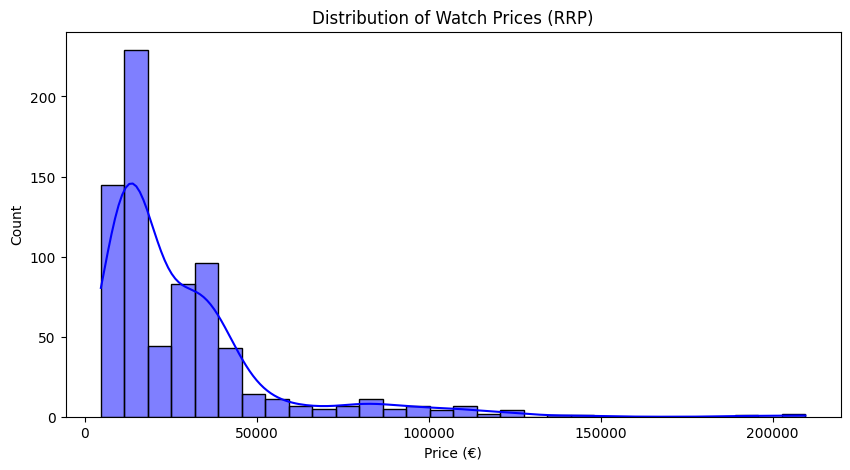

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(watch_data['RRP'], bins=30, kde=True, color='blue')
plt.title('Distribution of Watch Prices (RRP)')
plt.xlabel('Price (€)')
plt.ylabel('Count')
plt.show()

In [42]:
#mian gin charak enheraf az meyar 
#chanta az che nooi sat darim az rooya colection

print(watch_data.describe())
print(watch_data['Collection'].value_counts())

             Size            RRP  Annual Calendar  Chronograph        Date    Day Date  Day and Night Indicator       Diver   Dual Time         GMT   Moonphase  Regatta Chronograph  Small Seconds  Stop Seconds
count  729.000000     729.000000       729.000000   729.000000  729.000000  729.000000               729.000000  729.000000  729.000000  729.000000  729.000000           729.000000     729.000000    729.000000
mean    34.016461   28348.230453         0.002743     0.038409    0.924554    0.182442                 0.002743    0.041152    0.002743    0.027435    0.001372             0.005487       0.038409      0.599451
std      4.252311   25771.608543         0.052342     0.192313    0.264291    0.386473                 0.052342    0.198779    0.052342    0.163459    0.037037             0.073921       0.192313      0.490346
min     26.000000    4680.000000         0.000000     0.000000    0.000000    0.000000                 0.000000    0.000000    0.000000    0.000000    0.000000 

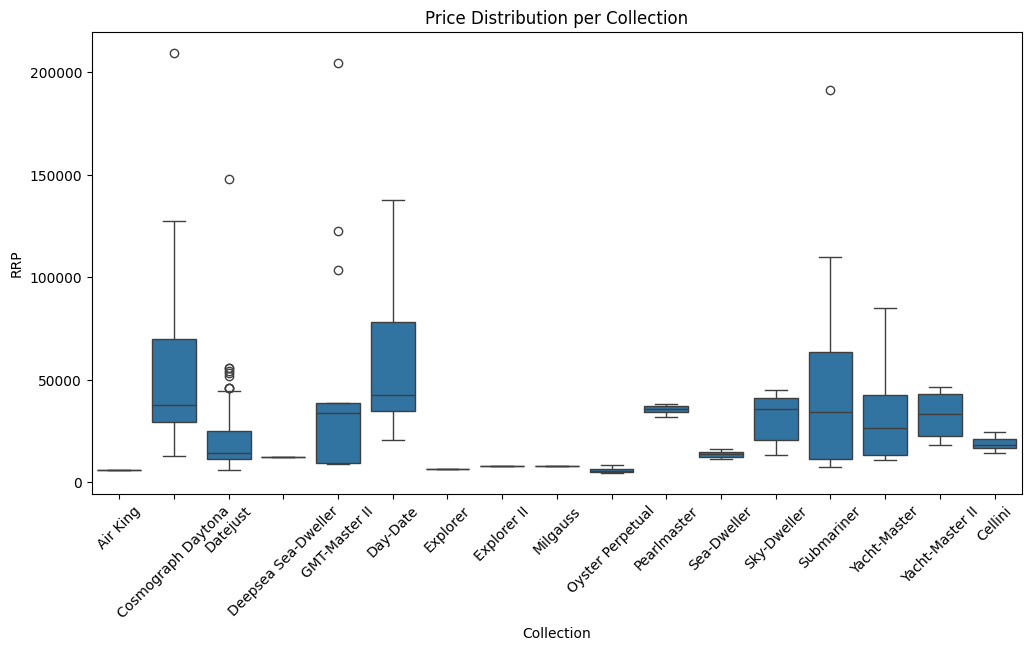

In [43]:
# namayesh categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Collection', y='RRP', data=watch_data)
plt.xticks(rotation=45)
plt.title('Price Distribution per Collection')
plt.show()

In [44]:
#daste bandi collction va ghamat miangin
avg_price_per_collection = watch_data.groupby('Collection')['RRP'].mean().sort_values(ascending=False)
print(avg_price_per_collection)

Collection
Day-Date               55759.849624
Cosmograph Daytona     52615.714286
Submariner             49876.363636
GMT-Master II          49283.076923
Pearlmaster            35655.000000
Yacht-Master           32847.272727
Yacht-Master II        32625.000000
Sky-Dweller            31460.000000
Datejust               18622.851064
Cellini                18465.882353
Sea-Dweller            13560.000000
Deepsea Sea-Dweller    12300.000000
Milgauss                7980.000000
Explorer II             7980.000000
Explorer                6240.000000
Air King                6180.000000
Oyster Perpetual        5850.000000
Name: RRP, dtype: float64


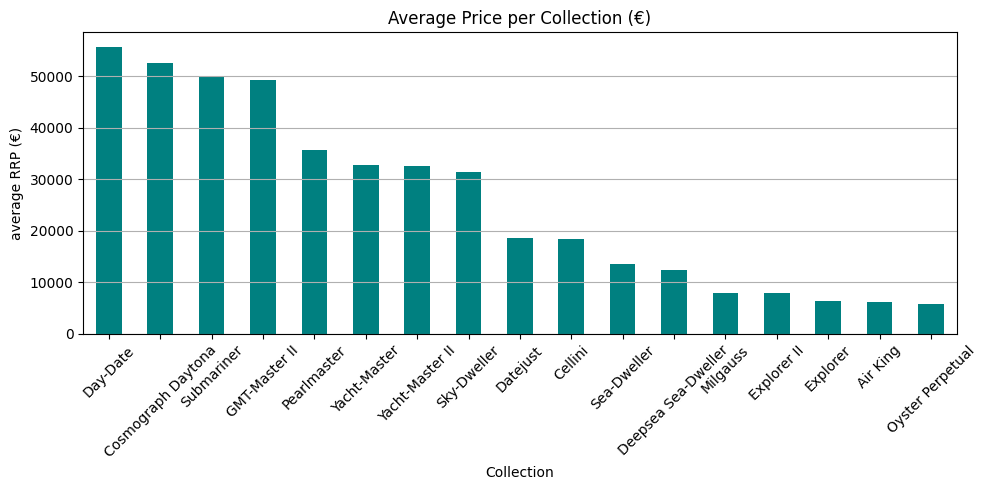

In [45]:
# nemoodaresh
avg_price_per_collection.plot(kind = 'bar', figsize = (10,5) , color ='teal')
plt.title('Average Price per Collection (€)')
plt.ylabel('average RRP (€)')
plt.xlabel('Collection')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [46]:
# moratab sazi dade ha  aval sum dataye gom shode
print(watch_data.isnull().sum())
# dade ba tamiz kari ghabli k anjam shood kaamelan tamize

Size                       0
Reference                  0
Collection                 0
Description                0
RRP                        0
Annual Calendar            0
Chronograph                0
Date                       0
Day Date                   0
Day and Night Indicator    0
Diver                      0
Dual Time                  0
GMT                        0
Moonphase                  0
Regatta Chronograph        0
Small Seconds              0
Stop Seconds               0
dtype: int64


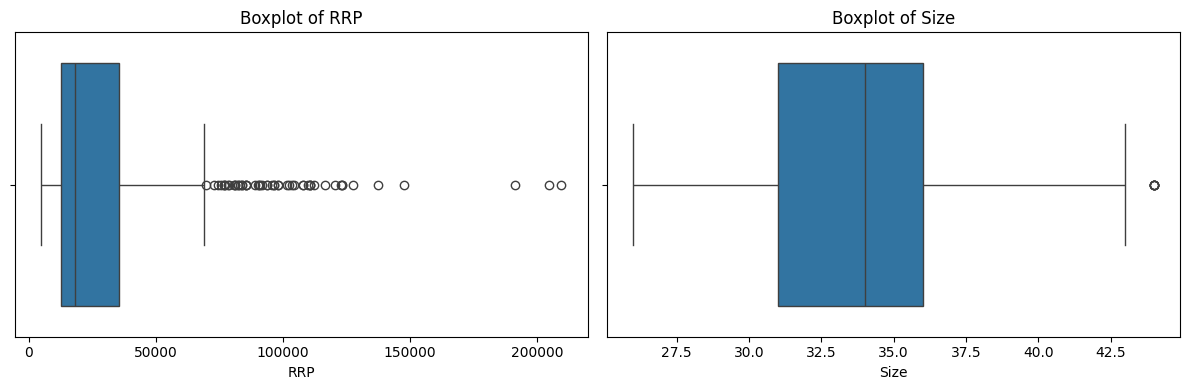

In [47]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)



sns.boxplot(x=watch_data['RRP'])
plt.title('Boxplot of RRP')

plt.subplot(1, 2, 2)
sns.boxplot(x=watch_data['Size'])
plt.title('Boxplot of Size')

plt.tight_layout()
plt.show()

In [48]:
#joda va 0,1 kardan dade haye collection

watch_data = pd.get_dummies(watch_data, columns=['Collection'], prefix='Collection')
bool_cols = watch_data.select_dtypes(include=['bool']).columns
watch_data[bool_cols] = watch_data[bool_cols].astype(int)


In [49]:
# tabe baraye estekhraj maghadir az tozihate saat
def extract_featurs(patern,txt,replacements = None):
    if pd.isna(txt):
        return "None"
    match = re.search(patern,txt,re.IGNORECASE)
    if match:
        val = match.group(1).strip()
        if replacements and val in replacements:
            return replacements[val]
        return val
    return "None"

In [50]:
# estekhraj nooe dial
watch_data['Dial'] = watch_data['Description'].apply(lambda txt: extract_featurs(r'^(.*?)\s*Dial',txt,replacements={"Mother of Peal Diamond":"Mother of Pearl Diamond","\xa0Standard": "Standard"}))
# estekhraje nooe Bracelet
watch_data['Bracelet'] = watch_data['Description'].apply(lambda txt : extract_featurs(r'\b(\w+)\b\s+Bracelet\b', txt))
# estekhraaje nooe strape agar bashe 
watch_data['Strap'] = watch_data["Description"].apply(lambda txt : extract_featurs(r'\b(\w+)\b\s+Strap\b', txt))

In [51]:
# tabdil dade hii k dar avordiim be 0,1
watch_data = pd.get_dummies(watch_data, columns=["Dial", "Bracelet", "Strap"], prefix=["Dial", "Bracelet", "Strap"])
bool_cols = watch_data.select_dtypes(include=['bool']).columns
watch_data[bool_cols] = watch_data[bool_cols].astype(int)
# hazf Descriptin
watch_data = watch_data.drop(columns=["Description"])


In [52]:
# mohasebe matrix hambastegi
numeric_data = watch_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

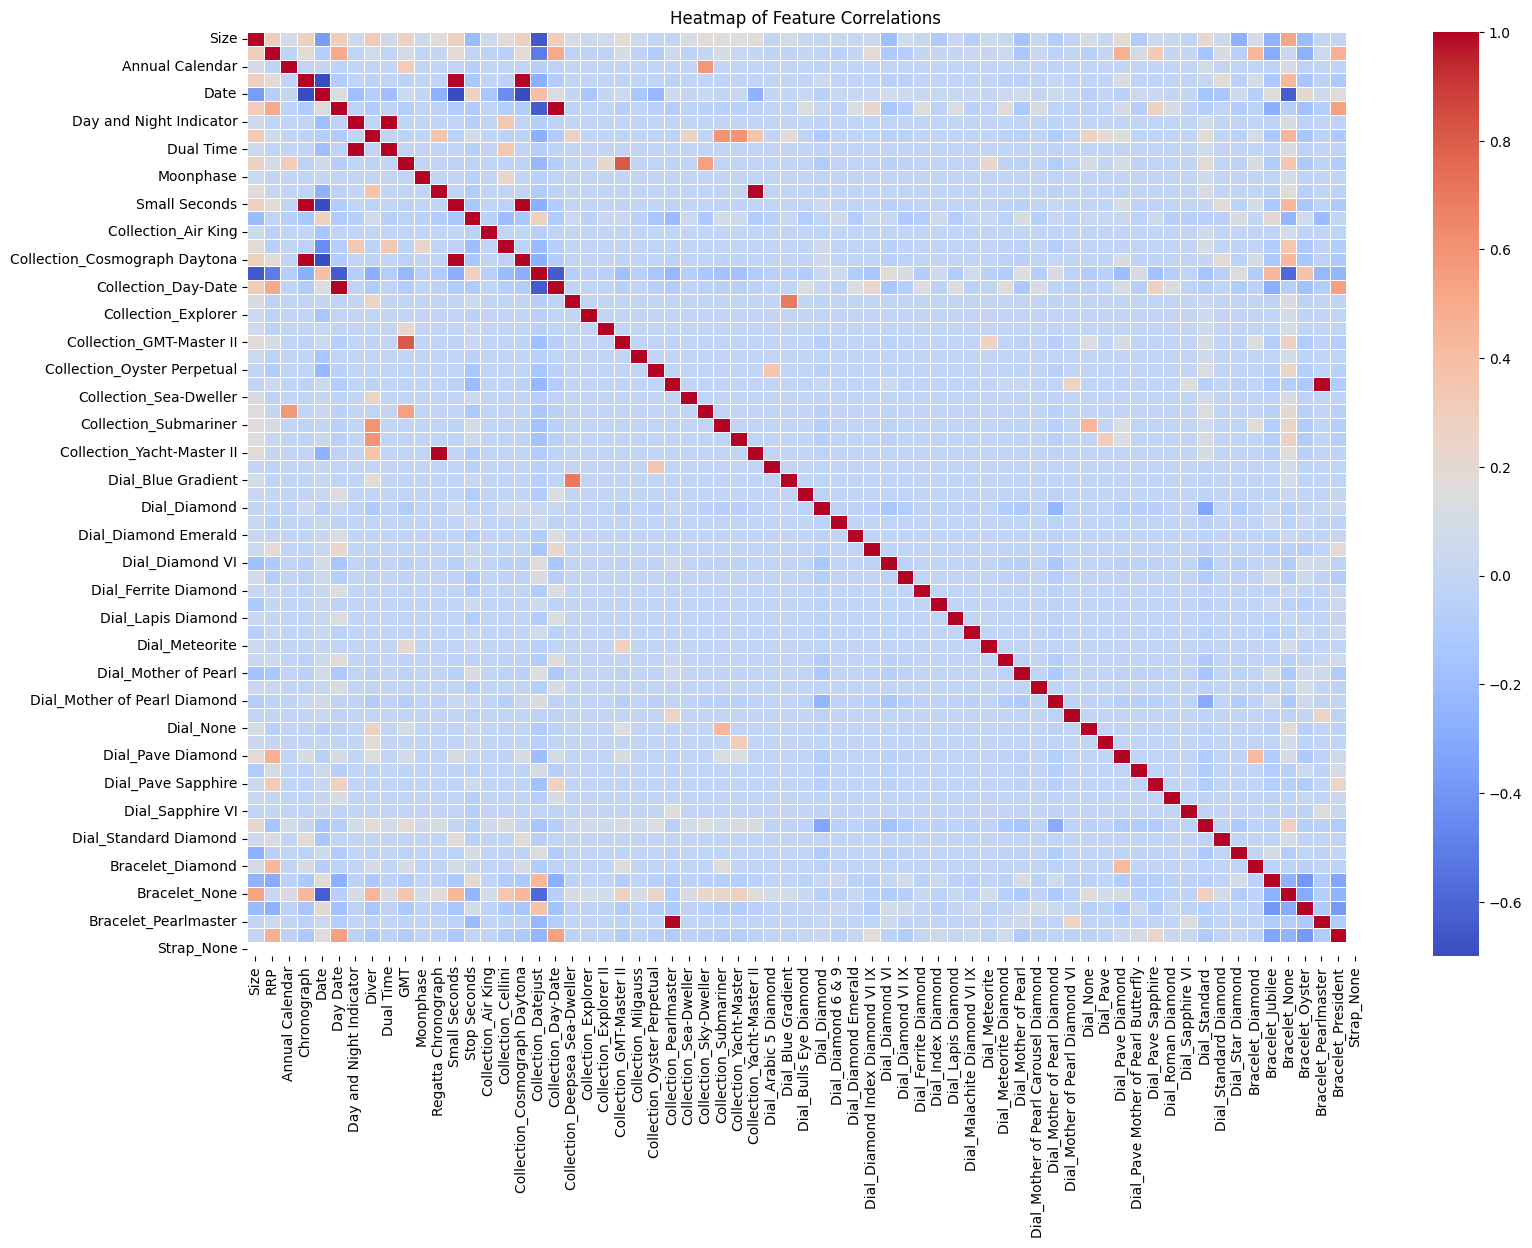

In [53]:
# rasm nemoodare hitmap
plt.figure(figsize=(18, 12))  
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

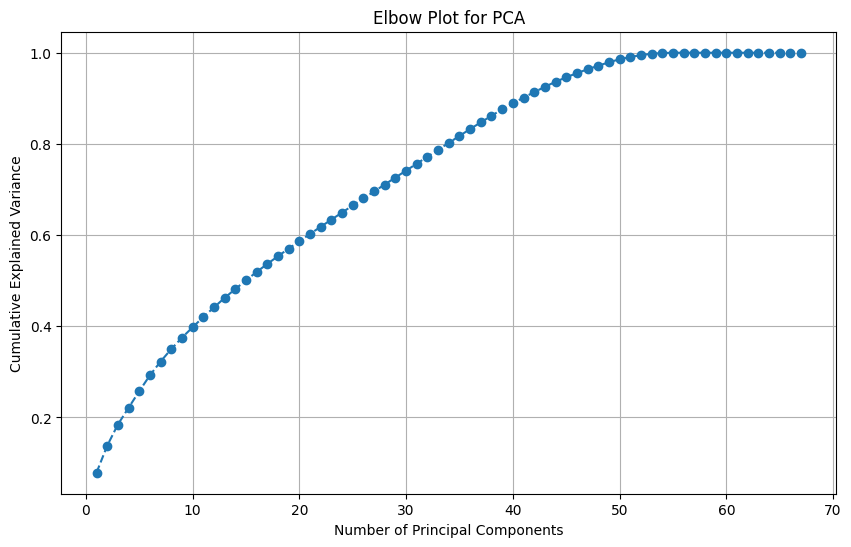

In [54]:
#noraml sazi dade ha
scaler = StandardScaler()
scaled_data = scaler.fit_transform(watch_data.select_dtypes(include=['number']))

#gereftan pca ba moalefe ziad
pca = PCA(n_components=scaled_data.shape[1])
pca.fit(scaled_data)

#gereftan variance posheshdade shode tavasot har malefe
explained_variance = pca.explained_variance_ratio_

# rasm nemoodar
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.grid(True)
plt.show()

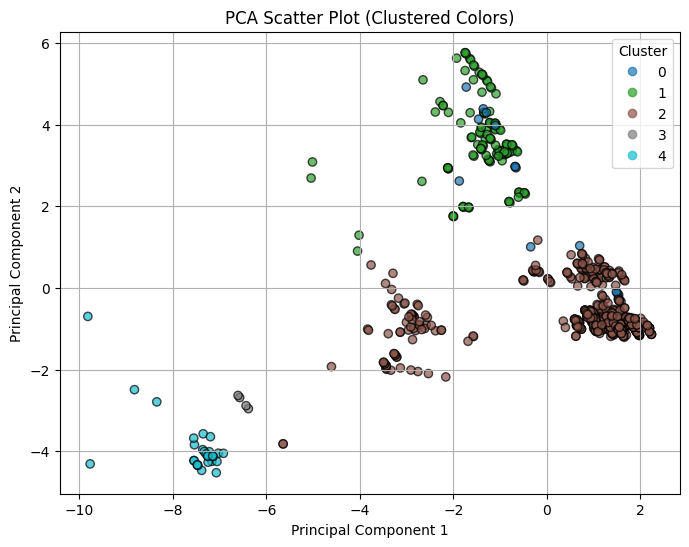

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(pca_components)


plt.figure(figsize=(8,6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='tab10', alpha=0.7, edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot (Clustered Colors)')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()